# Corona Virus US cases for the next 14 days: prediction using data since February 15th from worldometer website

### I update the data set "cases.csv" everyday with newly available data and predict the next 14 days. 0 corresponds to February 15th and every day after is 1,2,3.. and so on

In [1]:
import numpy as np
import pandas as pd
from pylab import *
from scipy.optimize import curve_fit

### Extract the data:

In [2]:
df = pd.read_csv("cases.csv",names = ["Day","Date","Cases"]).dropna()

### Separate x features and y labels by day and cases respectively

In [3]:
x = np.array(df['Day'])
y = np.array(df['Cases'])

### Get the x features for the next 14 days that we want to predict:

In [4]:
x_pred_future = []
today = df.shape[0]+1
for i in range (today,today+14):
    x_pred_future.append(i)
x_pred_future = np.array(x_pred_future)

### Do a polynomial fit based on viral exponential growth, with weight w = sqrt(y) (might have to adjust weight):

In [5]:
coef = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))

### Predict the next 14 days using the fitted algorithm:

In [6]:
y_pred_future = np.exp(coef[1])*np.exp(coef[0]*x_pred_future)

### Actual values since February 15th till TODAY:

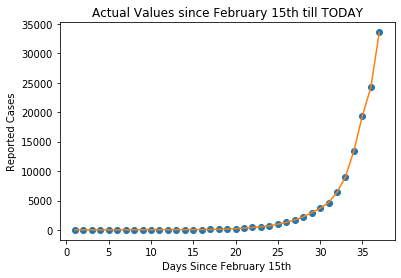

In [7]:
plt.plot(x, y, "o")
plt.plot(x, y)
plt.xlabel('Days Since February 15th')
plt.ylabel('Reported Cases')
plt.title("Actual Values since February 15th till TODAY")
plt.show()

### Predicted cases for the next 14 days starting TODAY:

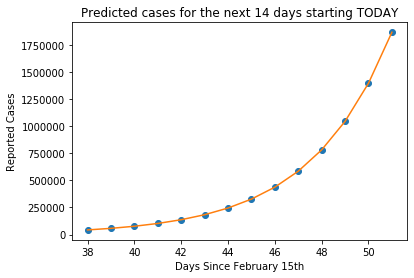

In [8]:
plt.plot(x_pred_future, y_pred_future, "o")
plt.plot(x_pred_future, y_pred_future)
plt.xlabel('Days Since February 15th')
plt.ylabel('Reported Cases')
plt.title("Predicted cases for the next 14 days starting TODAY")
plt.show()

### Previous graphs put together:

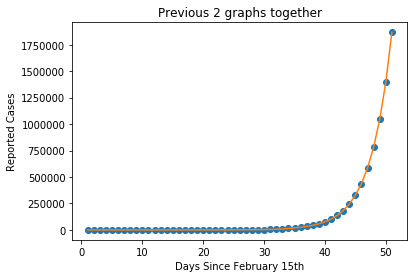

In [9]:
final_x = np.concatenate([x,x_pred_future],axis = None)
final_y = np.concatenate([y,y_pred_future],axis = None)
plt.plot(final_x, final_y, "o")
plt.plot(final_x, final_y)
plt.xlabel('Days Since February 15th')
plt.ylabel('Reported Cases')
plt.title("Previous 2 graphs together")
plt.show()

### Predicted number of reported cases in the USA for the next 2 weeks:

In [10]:
everything = np.array([final_x,final_y]).T
df = df.rename(columns={'Reported Cases': '14 day prediction:'})
df = pd.DataFrame(everything,columns = ['Days Since Outbreak','14 day prediction:'])
df = df.astype(int)

In [11]:
print(df.iloc[today-1:today+14][['14 day prediction:']].to_string(index=False))

 14 day prediction:
              42923
              57377
              76698
             102525
             137049
             183198
             244887
             327349
             437578
             584925
             781888
            1045176
            1397121
            1867578
